<a href="https://colab.research.google.com/github/Roarou/Computational-control/blob/main/COCO_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational control - Tutorial 1

We illustrate how to solve convex optimization programs using the open source Python-embedded modeling language CVXPY ([link](https://www.cvxpy.org/index.html#)). 

We first look at a least squares problem and subsequently consider a constrained optimization problem. 

In [1]:
# Package imports
import cvxpy as cp              
import numpy as np              
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
plt.style.use('seaborn-white')   

# Set random seed
np.random.seed(1)
# Set nice printing format
np.set_printoptions(precision=3)

<ipython-input-1-bb72ba7b607c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


# Least squares problems

A  _least squares problem_ is an optimization problem with no constraints 
and a cost function which is a sum of squares of affine terms in the unknown decision variable:

$$  
\begin{equation} \tag{LS}
    \begin{array}{ll}
    \mbox{minimize}   & \lVert Ax - b \rVert_2^2
    \end{array}
\end{equation}
$$

where $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$  are problem data and $x \in \mathbb{R}^{n}$ is the decision variable.  

Least squares problems are ubiquituous in the context of data fitting.  For example, consider the model

$$
y =Ax+ \nu
$$

where $y \in \mathbb{R}^m$ is a vector of measurements, $x \in \mathbb{R}^{n}$ is a vector of parameters to be estimated, and $\nu \in \mathbb{R}^m$ is measurement error that is unknown, but assumed to be small (in the norm $\lVert \, \cdot \, \rVert_2$). In this context, it makes sense to pose the estimation problem as that of finding $x^* \in \mathbb{R}^{n}$ such that

$$
\begin{equation}
x^* \in
    \begin{array}{ll}
    \arg\mbox{min}   & \lVert Ax - y \rVert_2^2 .
    \end{array}
\end{equation}
$$


The number of measurements $m$ is usually much larger than the number of parameters $n,$ i.e. $m\gg n$. Least squares problems can be therefore seen as a tool to approximate the solution of overdetermined systems, i.e. sets of equations in which there are more equations than unknowns.

In [2]:
# Parameters
m = 15
n = 10

# Generate data
A = np.random.randn(m, n)
b = np.random.randn(m)

# Variables
x = cp.Variable(n)
# Cost
cost = cp.sum_squares(A @ x - b)
# Constraints
constraints = [];
# Problem
prob = cp.Problem(cp.Minimize(cost),constraints)
# Solution
prob.solve()

# Print result
print("\nThe optimal value is", prob.value)
print("A solution is x =",x.value)


The optimal value is 8.54198220092367
A solution is x = [-0.178  0.338 -0.235  0.125 -0.425 -0.008 -0.244  0.191  0.193  0.113]


### Constraints
Constraints arise for a variety of reasons and can be naturally added to the basic least squares problem (LS). For example, constraints arise 

*   to rule out certain unacceptable approximations;
*   to incorporate prior information about desired estimates;
*   to encode information about the geometry of a problem.

For example, consider the optimization problem

$$  
\begin{equation} \tag{LS-C}
    \begin{array}{ll}
    \mbox{minimize}   & \lVert Ax - b \rVert^2 \\
    \mbox{subject to} & \lVert x \rVert_\infty  \leq \alpha.
    \end{array}
\end{equation}
$$

where $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$  are problem data, $x \in \mathbb{R}^{n}$ is the decision variable, and $\alpha >0$ is a user-defined parameter. 

The constraint $\lVert x \rVert_\infty  \leq \alpha$ ensures that the solution $x$ is such that $-\alpha \le x_i \le \alpha.$


### Regularization


Regularization is another technique to incorporate prior information by adding extra terms to the cost function of the original problem.

For example, the least squares problem (LS) can be regularized to find a solution $x$ that makes the residual $\lVert Ax − b \rVert$ small and is itself small, if possible. In particular, _Tikhonov regularization_ turns (LS) into the optimization problem

$$  
\begin{equation} \tag{LS-TR}
    \begin{array}{ll}
    \mbox{minimize}   & \lVert Ax - b \rVert_2^2 +\lambda \lVert x \rVert_2^2 
    \end{array}
\end{equation}
$$

where $\lambda >0 $ is a user-defined parameter.


# Exercise 1

Define and solve the optimization problems (LS-C) and (LS-TR) for given random data and parameters.

In [3]:
 # Parameters
m = 15
n = 2

# Generate random data
A = np.random.randn(m, n)
b = np.random.randn(m)

# Parameter
Lambda = 10
alpha = 1

############################ Your code goes here ###############################

# Variables
x = cp.Variable(n)
# Cost
cost = cp.sum_squares(A @ x - b)  + Lambda*cp.norm(x,2)**2   # Add for (LS-TR) 
# Constraints
constraints = [] # constraints += [cp.norm(x,'inf') <= alpha] # Add for (LS-C)
# Problem
prob = cp.Problem(cp.Minimize(cost),constraints)
# Solution
prob.solve()

################################################################################

# Print result
print("A solution is x =",x.value,"\n")
if constraints and np.linalg.norm(x.value,np.inf)<=alpha:
  print("Constraints are satisfied")
print("\nThe optimal value is", prob.value,"\n")

# Visualize solution and constraint set in the 2D case if there are constraints 
if n ==2 and constraints:
    print("Here's a plot showing the location of the solution:\n")
    # Plot constraint set
    fig, ax = plt.subplots() 
    ax.add_patch(Polygon([[-alpha,-alpha],
                          [-alpha, alpha],
                          [ alpha, alpha],
                          [ alpha, -alpha]], 
                          closed=True,
                          color= "cornflowerblue",
                          fill=True))
    # Plot solution
    ax.plot(x.value[0], 
             x.value[1], 
             marker="o", 
             markersize=7.5, 
             markeredgecolor="black", 
             markerfacecolor="coral") 

A solution is x = [ 0.086 -0.01 ] 


The optimal value is 23.254679961545722 



# Constrained optimization

Consider the constrained optimization problem 

$$  
\begin{equation} \tag{CO}
    \begin{array}{ll}
    \mbox{minimize}   & f(x) \\
    \mbox{subject to} & g(x) \le 0
    \end{array}
\end{equation}
$$

with decision variable $x \in \mathbb{R}^2,$ cost function

$$
f(x) = \left( x_1 -3/2\right)^2 + \left( x_2 -2\right)^2
$$

and constraint set defined by

$$
g(x) = 
\begin{pmatrix}
-x_1 \\
-x_2 \\
-1+x_1+x_2 
\end{pmatrix}
$$

The cost function of problem (CO) is convex. The inequality constraints of problem (CO) define a convex set (whose boundary is a triangle). Problem (CO) is therefore convex and easily solved using CVXPY.

In [ ]:
# Variables
x = cp.Variable(2)
# Cost
cost = (x[0]-1.5)**2 +(x[1]-2)**2
# Constraints
constraints = [-x[0] <=0, -x[1] <=0, -1+x[0]+x[1] <=0];
# Problem
prob = cp.Problem(cp.Minimize(cost),constraints)
# Solution
prob.solve()

# Print result
print("A solution is x =",x.value,"\n")
if np.linalg.norm(x.value,np.inf)<=alpha:
  print("Constraints are satisfied")
print("\nThe optimal value is", prob.value)

A solution is x = [0.25 0.75] 

Constraints are satisfied

The optimal value is 3.125


We could have guessed the the solution by visual inspection.

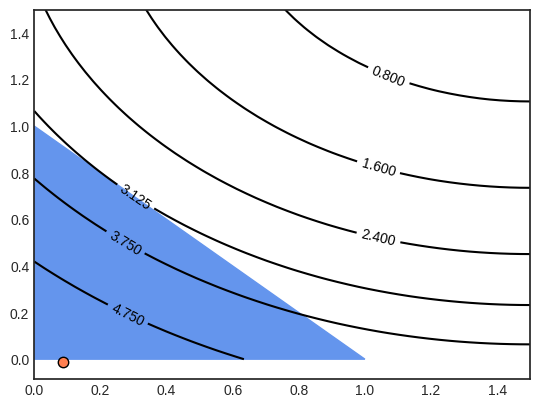

In [4]:
# Define function
def f(x1, x2):
    return (x1-1.5)**2+(x2-2)**2

# Define meshgrid
x1 = np.linspace(0, 1.5, 50)
x2 = np.linspace(0, 1.5, 40)
X1, X2 = np.meshgrid(x1, x2)
# Contour plot of function
fig, ax = plt.subplots() 
levels = [0.8, 1.6, 2.4, 3.125, 3.75, 4.75];
CS = ax.contour(X1, X2, f(X1, X2), levels=levels,colors='black')
ax.clabel(CS, inline=1, fontsize=10)
# Add constraint set
ax.add_patch(Polygon([[0,0],[0,1],[1,0]], 
                     closed=True,
                     color= "cornflowerblue",
                     fill=True))
# Plot solution
ax.plot(x.value[0], 
        x.value[1], 
        marker="o", 
        markersize=7.5, 
        markeredgecolor="black", 
        markerfacecolor="coral") 

## Exercise 2

Let's show that the optimal point $x^{*}$ satisfies the KKT conditions. 

How to do that? Well, this amounts to showing that the gradient of the cost function $\nabla f(x)$ is parallel to the normal vector to the side of the triangle on which $x^{*}$ lies...

In your investigations, consider the following steps:

1.   Compute the value of the multiplier $\mu^{*}$ that makes the two gradients equal and opposite, i.e.

$$
\nabla f(x^{*}) +\mu^{*} \nabla g_3(x^{*}) = 0
$$

2. Are the constraints defined by the inequalities $g_1(x)\le 0$ and $g_2(x)\le 0$ active?
3. Check whether the multiplier $\mu^{*}$ is actually the correct one using CVX. [Hint: Check the value of each constraints[i].dual_value]
  

In [ ]:
############################ Your code goes here ###############################

print("optimal (g_3(x) <= 0) dual variable", constraints[2].dual_value)

################################################################################

optimal (g_3(x) <= 0) dual variable 2.5
